In [6]:
%cd /media/video/Temp/
%ls

/media/video/Temp
IROS_wiring.png                temp_profile1.csv
IROS_wiring.xcf                temp_profile2.csv
sensor_resistance_0_80.csv     vlcsnap-2018-11-20-14h44m48s327.png
sensor_resistance_110_170.csv  vlcsnap-2018-11-20-14h45m12s669.png
sensor_resistance_80_90.csv    vlcsnap-2018-11-20-14h54m27s604.png
sensor_resistance_90_110.csv   vlcsnap-2018-11-20-15h51m18s821.png
sensor_resistance_rest2.csv    vlcsnap-2018-11-20-15h51m57s366.png
sensor_resistance_rest.csv


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

In [16]:
d1=np.genfromtxt('sensor_resistance_0_80.csv',delimiter=',',names=True)
d2=np.genfromtxt('sensor_resistance_110_170.csv',delimiter=',',names=True)
d3=np.genfromtxt('sensor_resistance_80_90.csv',delimiter=',',names=True)
d4=np.genfromtxt('sensor_resistance_90_110.csv',delimiter=',',names=True)
d5=np.genfromtxt('sensor_resistance_rest.csv',delimiter=',',names=True)
d6=np.genfromtxt('sensor_resistance_rest2.csv',delimiter=',',names=True)
d7=np.genfromtxt('temp_profile1.csv',delimiter=',',names=True)
d8=np.genfromtxt('temp_profile2.csv',delimiter=',',names=True)

In [25]:
PWM=np.hstack((d1['pwm'],d2['pwm'],d3['pwm'],d4['pwm'],d5['pwm'],d6['pwm'],d7['pwm'],d8['pwm']))
Temp=np.hstack((d1['Temperature'],d2['Temperature'],d3['Temperature'],d4['Temperature'],d5['Temperature'],d6['Temperature'],d7['Temperature'],d8['Temperature']))
Sensor=np.hstack((d1['Sensor'],d2['Sensor'],d3['Sensor'],d4['Sensor'],d5['Sensor'],d6['Sensor'],d7['Sensor'],d8['Sensor']))
Heater=np.hstack((d1['heater'],d2['heater'],d3['heater'],d4['heater'],d5['heater'],d6['heater'],d7['heater'],d8['heater']))
Time=np.hstack((d1['heater'],d2['heater'],d3['heater'],d4['heater'],d5['heater'],d6['heater'],d7['heater'],d8['heater']))

<IPython.core.display.Javascript object>


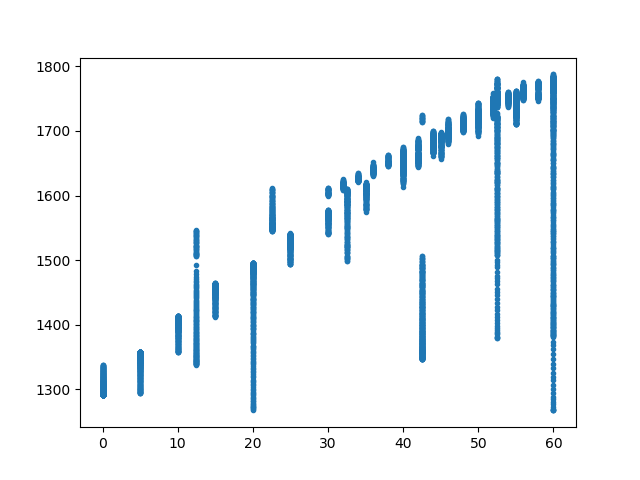

In [27]:
%matplotlib notebook
plt.plot(PWM,Sensor,'.')

In [355]:
#%matplotlib notebook
#plt.plot(sig.lfilter([1],np.ones(1),np.diff(Temp)),'.')
#plt.plot(sig.lfilter(np.ones(50),50*np.ones(1),np.diff(Temp)),'.')
pw=3
w=3
w2=3
w3=0
sel=np.array([np.max(np.hstack(([0],np.abs(np.diff(Temp)[i-w:i])))) if i>=w else 50 for i in range(len(Temp)-1)])
#A=np.array([np.hstack((PWM[i],PWM[i]**2,PWM[i]**3,Temp[i-w:i],Temp[i-w2:i]**2,Temp[i-w3:i]**3,[1])) for i in np.nditer(np.where(sel<10))])
A=np.array([np.hstack((PWM[i-pw:i],Temp[i-w:i],Temp[i-w2:i]**2,Temp[i-w3:i]**3,[1])) for i in np.nditer(np.where(sel<10))])
Tb=np.array([Temp[i] for i in np.nditer(np.where(sel<10))])
Hb=np.array([Heater[i] for i in np.nditer(np.where(sel<10))])
Sb=np.array([Sensor[i] for i in np.nditer(np.where(sel<10))])

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


<IPython.core.display.Javascript object>


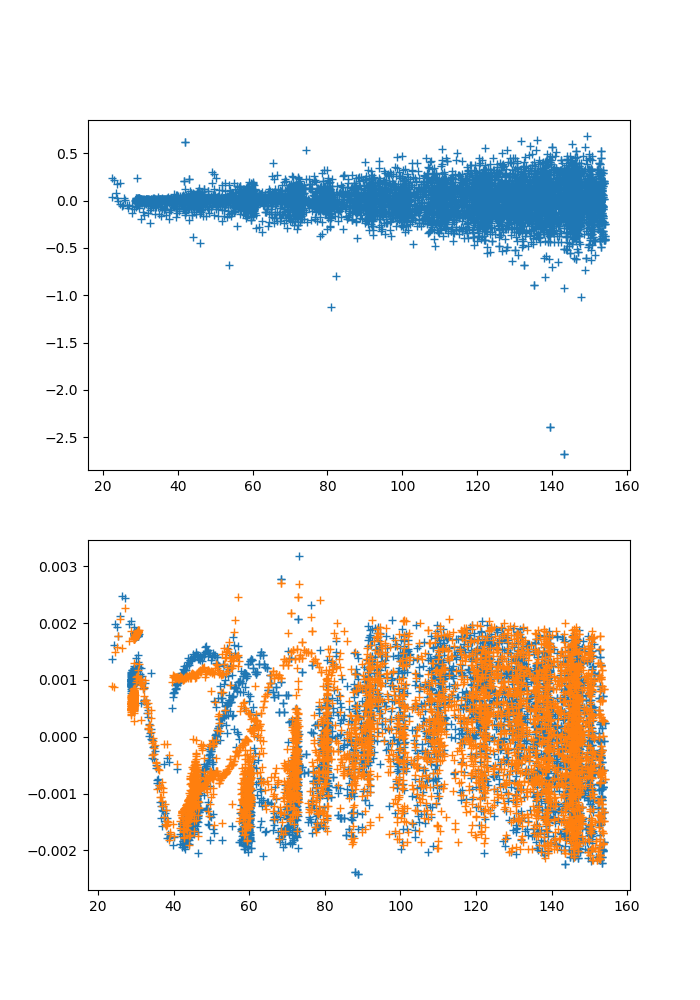

[ 1.32552275e-04 -1.43825110e-04  1.25249879e-04  2.76832372e-03
 -1.10103544e-03  1.59932900e-03 -4.99814941e-06  7.31603008e-06
 -1.97014026e-06  1.00000000e+00]
[ 1.45358298e-04 -1.10725460e-04  9.51257800e-05  2.37887474e-03
 -1.06150564e-03  1.95749622e-03  5.38827129e-07  4.38620368e-06
 -4.90732755e-06  1.00000000e+00]


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # Remove the CWD from sys.path while we load stuff.
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  from ipykernel import kernelapp as app
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the futur

In [378]:
%matplotlib notebook
Tsol=np.linalg.lstsq(A,Tb)
Tsim=np.matmul(A,Tsol[0])
plt.figure(figsize=(7,10))
plt.subplot(211)
ic=np.where(np.abs((Tb-Tsim)/Tsim)<0.002)[0]

A2=A[ic,:]
Tb2=Tb[ic]
Tsol=np.linalg.lstsq(A2,Tb2)
Tsim=np.matmul(A,Tsol[0])
plt.plot(Tsim,Tb-Tsim,"+")


Hsol=np.linalg.lstsq(A2,Hb[ic])
Hsim=np.matmul(A2,Hsol[0])
Ssol=np.linalg.lstsq(A2,Sb[ic])
Ssim=np.matmul(A2,Ssol[0])

ic2=np.where(  np.logical_and(( np.abs((Sb[ic]-Ssim)/Ssim)<0.002 ) , ( np.abs((Hb[ic]-Hsim)/Hsim)<0.002 ) ))[0]

Hsol=np.linalg.lstsq(A2[ic2,:],Hb[ic][ic2])
Hsim=np.matmul(A2[ic2,:],Hsol[0])
Ssol=np.linalg.lstsq(A2[ic2,:],Sb[ic][ic2])
Ssim=np.matmul(A2[ic2,:],Ssol[0])


plt.subplot(212)
plt.plot(Tsim[ic][ic2],(Hb[ic][ic2]-Hsim)/Hsim,"+")
plt.subplot(212)
plt.plot(Tsim[ic][ic2],(Sb[ic][ic2]-Ssim)/Ssim,"+")
#plt.plot(Tsim)
print(Hsol[0]/Hsol[0][-1])
print(Ssol[0]/Ssol[0][-1])

In [376]:
((Ssol[0][3]+Ssol[0][4]+Ssol[0][5])/Ssol[0][-1],
 (Hsol[0][3]+Hsol[0][4]+Hsol[0][5])/Hsol[0][-1],
 (Ssol[0][6]+Ssol[0][7]+Ssol[0][8])/Ssol[0][-1],
 (Hsol[0][6]+Hsol[0][7]+Hsol[0][8])/Hsol[0][-1])

(0.0032991657856840588,
 0.0033067749484785645,
 -8.168128100945934e-08,
 1.9638076284186247e-07)

In [396]:
s2=(Tsol[0][6]+Tsol[0][7]+Tsol[0][8])
s1=(Tsol[0][3]+Tsol[0][4]+Tsol[0][5])
s0=(Tsol[0][0]+Tsol[0][1]+Tsol[0][2])
Ttest2=50
pt=(Ttest2-Ttest2*s1-s2*Ttest2**2-Tsol[0][-1])/s0
np.matmul(np.array([pt,pt,pt,Ttest2,Ttest2,Ttest2,Ttest2**2,Ttest2**2,Ttest2**2,1]),Tsol[0]),pt

(50.0, 2.7680280258983467)

<IPython.core.display.Javascript object>


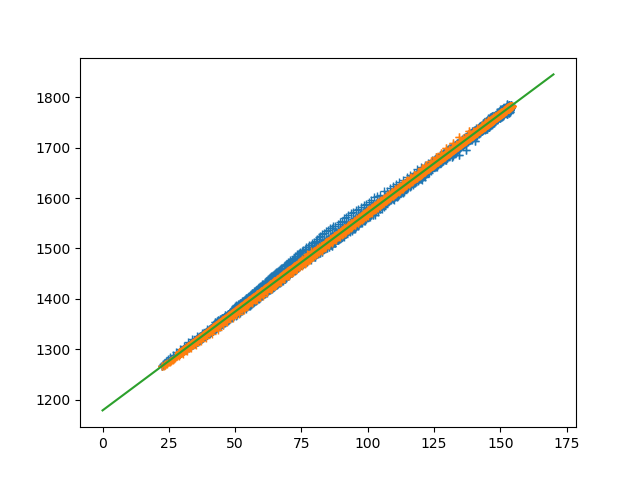

In [317]:
Ttest=np.linspace(0,170,1000).reshape(1000,1)
Atest=np.hstack((np.repeat(Ttest,w,1),np.repeat(Ttest**2,w2,1),np.repeat(Ttest**3,w3,1),np.ones((1000,1))))
Htest=np.matmul(Atest,Hsol[0])
Stest=np.matmul(Atest,Ssol[0])
%matplotlib notebook
#plt.plot(Ttest,Htest)
plt.plot(Temp,Sensor,"+")
plt.plot(Tsim,Ssim,"+")
plt.plot(Ttest,Stest)

<IPython.core.display.Javascript object>


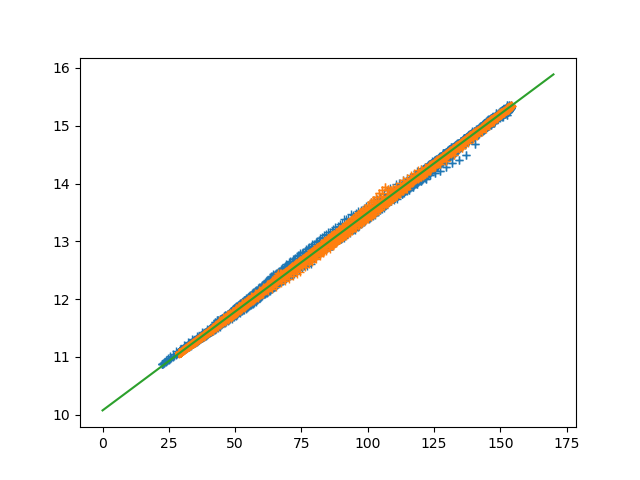

In [280]:
%matplotlib notebook
plt.plot(Temp,Heater,"+")
plt.plot(Tsim,Hsim,"+")
plt.plot(Ttest,Htest)

In [322]:
ws,hs=sig.freqz(np.flipud(Ssol[0][:-1]))
wh,hh=sig.freqz([1,1])

<IPython.core.display.Javascript object>


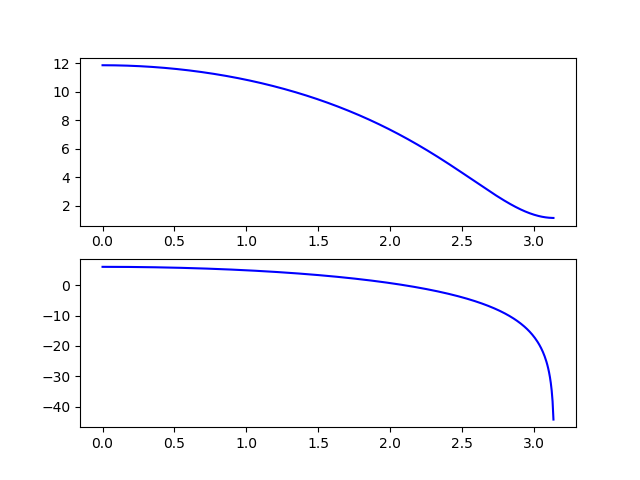

In [323]:
%matplotlib notebook
plt.subplot(211)
plt.plot(ws, 20 * np.log10(abs(hs)), 'b')
plt.subplot(212)
plt.plot(wh, 20 * np.log10(abs(hh)), 'b')

In [300]:
np.flipud(Ssol[0][:-1])

array([ 6.45732678, -0.50366639, -0.55584528, -1.1302373 , -0.6243969 ,
        0.42957658, -0.04884138, -0.07182169, -0.31143442, -0.15637449,
       -0.1668901 ,  0.05052841, -0.06872846, -0.21761773, -0.38111203,
        0.34931466, -0.52893587, -0.27761348, -1.02003848,  2.70532959])

In [303]:
Ssol[0][:-1]

array([ 2.70532959, -1.02003848, -0.27761348, -0.52893587,  0.34931466,
       -0.38111203, -0.21761773, -0.06872846,  0.05052841, -0.1668901 ,
       -0.15637449, -0.31143442, -0.07182169, -0.04884138,  0.42957658,
       -0.6243969 , -1.1302373 , -0.55584528, -0.50366639,  6.45732678])

In [366]:
A[ic[0],:].shape

(8262, 10)